<a href="https://colab.research.google.com/github/jamilaandimen/MLCoursera/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Imports
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import plotly.plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("Train_v2.csv", header='infer')
country = train_data['country'].tolist()
train_data = train_data.set_index(['uniqueid', 'country']) #The Id column will be our index
train_data['country'] = country
test_data = pd.read_csv("Test_v2.csv", header='infer')
country = test_data['country'].tolist()
test_data = test_data.set_index(['uniqueid', 'country'])
test_data['country'] = country

train_data.head()

,,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country
uniqueid,country,,,,,,,,,,,,
uniqueid_1,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Kenya
uniqueid_2,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Kenya
uniqueid_3,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Kenya
uniqueid_4,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Kenya
uniqueid_5,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Kenya


In [3]:
#Looking data format and types
print(train_data.info())

# printing test info()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23524 entries, (uniqueid_1, Kenya) to (uniqueid_2117, Uganda)
Data columns (total 12 columns):
year                      23524 non-null int64
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
country                   23524 non-null object
dtypes: int64(3), object(9)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10086 entries, (uniqueid_6056, Kenya) to (uniqueid_3002, Uganda)
Data columns (total 11 columns):
year                      10086 non-null int64
location_type             10086 

In [4]:
#Some Statistics
train_data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [5]:
#Take a look at the data
print(train_data.head())

                    year bank_account  ...                   job_type country
uniqueid   country                     ...                                   
uniqueid_1 Kenya    2018          Yes  ...              Self employed   Kenya
uniqueid_2 Kenya    2018           No  ...       Government Dependent   Kenya
uniqueid_3 Kenya    2018          Yes  ...              Self employed   Kenya
uniqueid_4 Kenya    2018           No  ...  Formally employed Private   Kenya
uniqueid_5 Kenya    2018           No  ...        Informally employed   Kenya

[5 rows x 12 columns]


In [6]:


#Looking how the data is and searching for a re patterns
train_data["job_type"].head()



uniqueid    country
uniqueid_1  Kenya                  Self employed
uniqueid_2  Kenya           Government Dependent
uniqueid_3  Kenya                  Self employed
uniqueid_4  Kenya      Formally employed Private
uniqueid_5  Kenya            Informally employed
Name: job_type, dtype: object

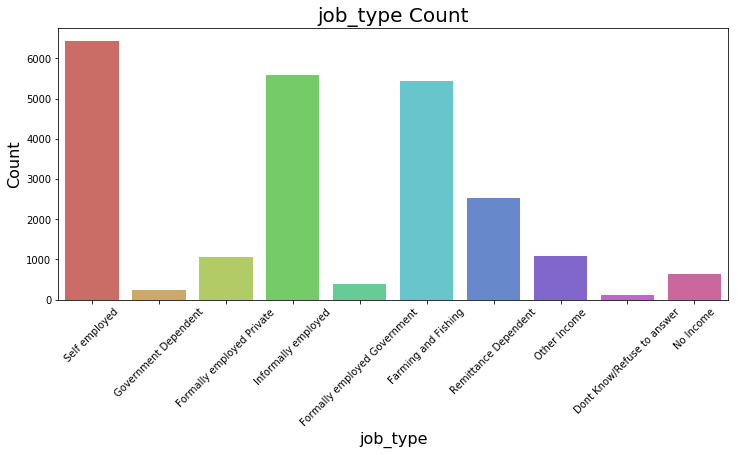

In [7]:
import re
#GettingLooking the prefix of all Passengers
#train_data.job_type = train_data.job_type.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='job_type', data=train_data, palette="hls")
plt.xlabel("job_type", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("job_type Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

Chances to have bank_account based on JOB TYPE: 
uniqueid    country
uniqueid_1  Kenya      1
uniqueid_2  Kenya      0
uniqueid_3  Kenya      1
uniqueid_4  Kenya      0
uniqueid_5  Kenya      0
Name: bank_account, dtype: int64
job_type
Dont Know/Refuse to answer      0.111111
Farming and Fishing             0.116706
Formally employed Government    0.775194
Formally employed Private       0.541232
Government Dependent            0.202429
Informally employed             0.079507
No Income                       0.020734
Other Income                    0.181481
Remittance Dependent            0.094974
Self employed                   0.131738
Name: bank_account, dtype: float64


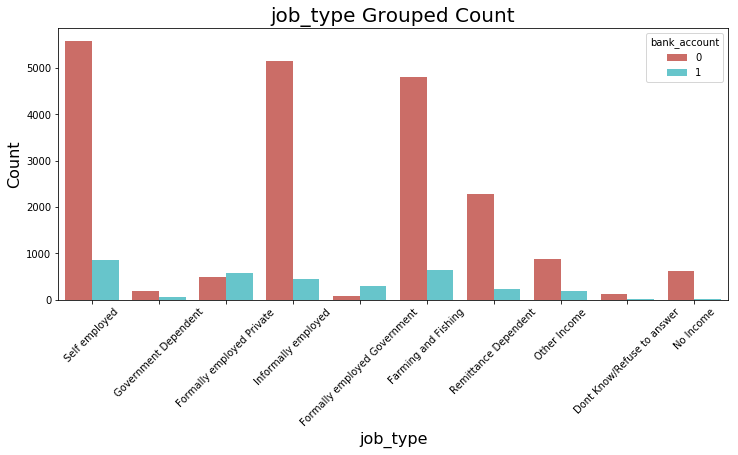

In [8]:
#printing the chance to survive by each title
print("Chances to have bank_account based on JOB TYPE: ") 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data[['bank_account']] = train_data[['bank_account']].apply(lambda col: le.fit_transform(col))
print(train_data['bank_account'].head())
#train_data = pd.get_dummies(train_data, columns = [bank_account])

print(train_data.groupby("job_type")["bank_account"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='job_type', data=train_data, palette="hls",
              hue="bank_account")
plt.xlabel("job_type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("job_type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()


Chances to have bank_account based on LOCATION TYPE: 
location_type
Rural    0.116503
Urban    0.178739
Name: bank_account, dtype: float64


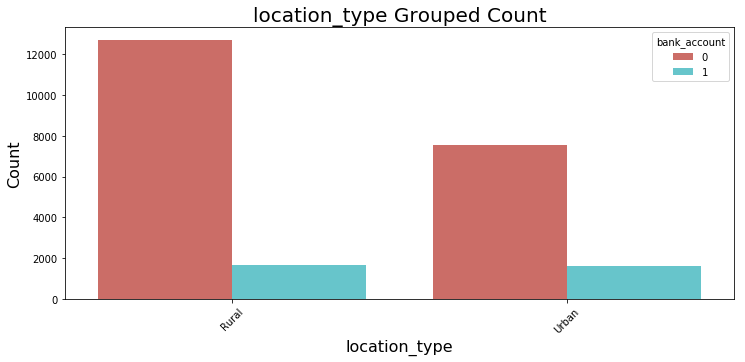

In [9]:
#printing the chance to survive by each title
print("Chances to have bank_account based on LOCATION TYPE: ") 

print(train_data.groupby("location_type")["bank_account"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='location_type', data=train_data, palette="hls",
              hue="bank_account")
plt.xlabel("location_type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("location_type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Chances to have bank_account based on age: 
age_of_respondent
16     0.010823
17     0.020964
18     0.035897
19     0.059574
20     0.057508
21     0.093418
22     0.102113
23     0.129252
24     0.144128
25     0.147727
26     0.183740
27     0.140351
28     0.167112
29     0.177950
30     0.167614
31     0.171306
32     0.180420
33     0.165085
34     0.164751
35     0.162679
36     0.197826
37     0.182028
38     0.203971
39     0.144385
40     0.182482
41     0.139683
42     0.235556
43     0.156334
44     0.169291
45     0.148936
         ...   
71     0.136842
72     0.154639
73     0.130435
74     0.125000
75     0.067114
76     0.125000
77     0.107143
78     0.084337
79     0.120690
80     0.145161
81     0.125000
82     0.121951
83     0.060606
84     0.100000
85     0.036364
86     0.120000
87     0.062500
88     0.083333
89     0.062500
90     0.035714
91     0.000000
92     0.000000
93     0.250000
94     0.000000
95     0.157895
96     0.000000
97     0.000000
98     0.0

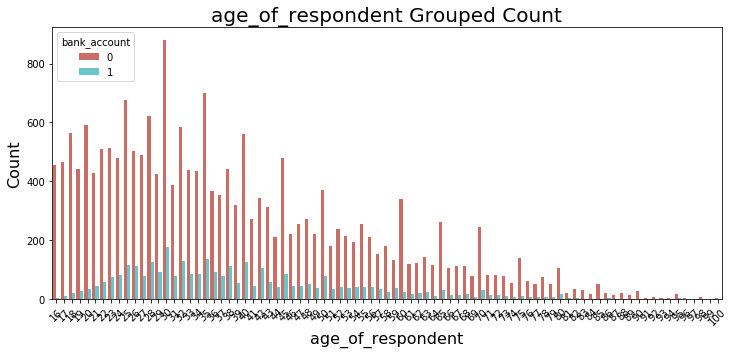

In [10]:
#printing the chance to survive by each title
print("Chances to have bank_account based on age: ") 


print(train_data.groupby("age_of_respondent")["bank_account"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='age_of_respondent', data=train_data, palette="hls",
              hue="bank_account")
plt.xlabel("age_of_respondent", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("age_of_respondent Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [11]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = train_data.groupby(["gender_of_respondent","job_type","location_type"])["age_of_respondent"]

#printing the variabe that we created by median
print(age_group.median())

gender_of_respondent  job_type                      location_type
Female                Dont Know/Refuse to answer    Rural            35.0
                                                    Urban            36.0
                      Farming and Fishing           Rural            40.0
                                                    Urban            43.0
                      Formally employed Government  Rural            36.0
                                                    Urban            34.0
                      Formally employed Private     Rural            30.0
                                                    Urban            28.0
                      Government Dependent          Rural            73.0
                                                    Urban            68.5
                      Informally employed           Rural            34.0
                                                    Urban            32.0
                      No Income               

In [12]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = train_data.groupby(["gender_of_respondent","job_type","location_type"])["bank_account"]

#printing the variabe that we created by median
print(age_group.median())

gender_of_respondent  job_type                      location_type
Female                Dont Know/Refuse to answer    Rural            0
                                                    Urban            0
                      Farming and Fishing           Rural            0
                                                    Urban            0
                      Formally employed Government  Rural            1
                                                    Urban            1
                      Formally employed Private     Rural            0
                                                    Urban            1
                      Government Dependent          Rural            0
                                                    Urban            0
                      Informally employed           Rural            0
                                                    Urban            0
                      No Income                     Rural            0
           

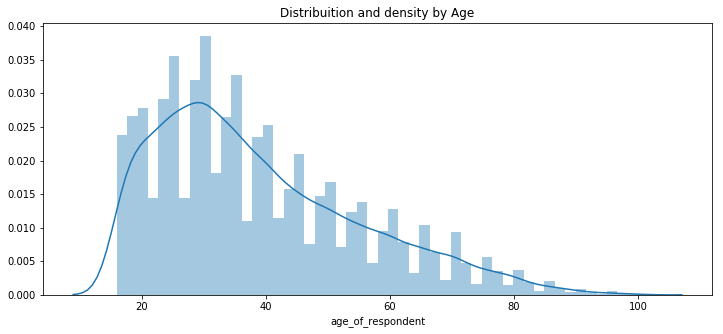

In [13]:


#Let's see the result of the inputation

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.distplot(train_data["age_of_respondent"], bins=50)
plt.title("Distribuition and density by Age")
plt.xlabel("age_of_respondent")
plt.show()



<Figure size 864x360 with 0 Axes>

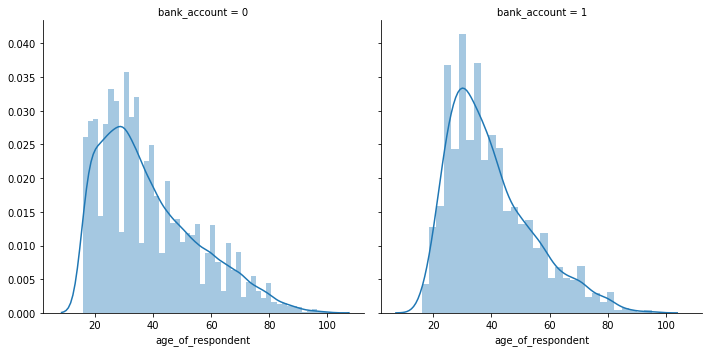

In [14]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(train_data, col='bank_account',size=5)
g = g.map(sns.distplot, "age_of_respondent")
plt.show()

In [15]:
#df_train.Age = df_train.Age.fillna(-0.5)

#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
train_data["Age_cat"] = pd.cut(train_data.age_of_respondent, interval, labels=cats)

# Printing the new Category
train_data["Age_cat"].head()


uniqueid    country
uniqueid_1  Kenya      Student
uniqueid_2  Kenya       Senior
uniqueid_3  Kenya        Young
uniqueid_4  Kenya        Young
uniqueid_5  Kenya        Young
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

bank_account     0     1
Age_cat                 
Teen          1488    36
Student       3637   440
Young         5468  1105
Adult         7104  1408
Senior        2515   323
uniqueid    country
uniqueid_1  Kenya      1
uniqueid_2  Kenya      0
uniqueid_3  Kenya      1
uniqueid_4  Kenya      1
uniqueid_5  Kenya      0
Name: cellphone_access, dtype: int64


KeyboardInterrupt: ignored

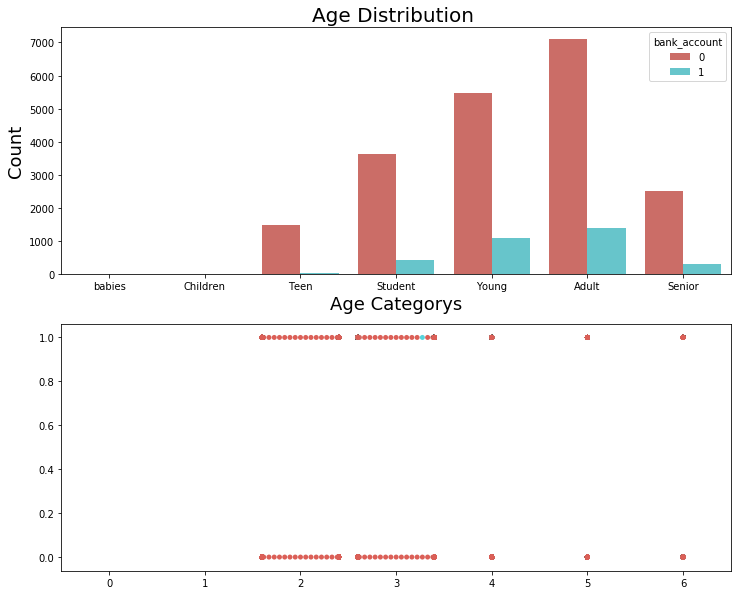

In [16]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
test_data["Age_cat"] = pd.cut(test_data.age_of_respondent, interval, labels=cats)

#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(train_data.Age_cat, train_data.bank_account))

train_data[['cellphone_access']] = train_data[['cellphone_access']].apply(lambda col: le.fit_transform(col))
print(train_data['cellphone_access'].head())


#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=train_data,hue="bank_account", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="cellphone_access",data=train_data,
              hue="bank_account", palette="hls", )
plt.ylabel("cellphone_access Distribution", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("cellphone_access Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()



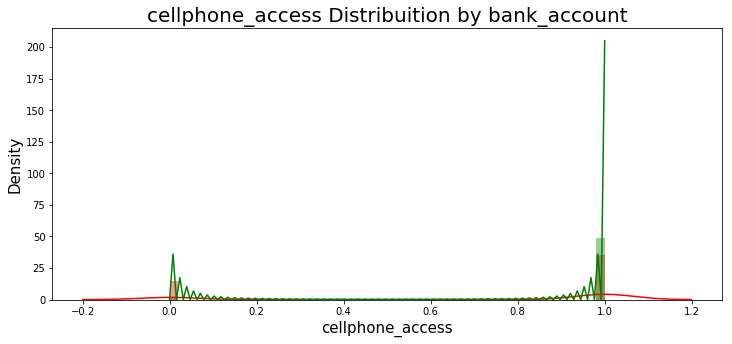

In [18]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.distplot(train_data[train_data.bank_account == 0]["cellphone_access"], 
             bins=50, color='r')
sns.distplot(train_data[train_data.bank_account == 1]["cellphone_access"], 
             bins=50, color='g')
plt.title("cellphone_access Distribuition by bank_account", fontsize=20)
plt.xlabel("cellphone_access", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

In [22]:

#Let's cross our cellphone_access with the Age_cat

#We will aggregate than to get the mean of Fare by each category pair

Age_cell = ['location_type', 'Age_cat'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(train_data[Age_cell[0]], train_data[Age_cell[1]], 
            values=train_data['cellphone_access'], aggfunc=['mean']).style.background_gradient(cmap = cm)



let's not forget that there are more people living in the rural area